In [1]:
import json
import glob
import numpy as np

In [2]:
# Template for Demographic Information:
# Name: 
# Age: 
# Gender: 
# Occupation: 
# Ethnicity: 
# Past Medical History:

In [3]:
def return_text_v2(input_text, pattern, file=None):
    try:
        return input_text.split(pattern)[1].split('\n')[0].strip()
    except IndexError:
        print(f'Error: {pattern} not found in {file}')
        return None

In [4]:
### ORIGINAL CODE
# # files = glob.glob('/Users/machine/Research/gpt4_bias/output/race_gender_v2/*')

# CONDITIONS = {}

# # row_labels = ['Bact PNA', 'COVID19', 'Osteomyelitis','Colon Cancer','Rheumatoid Arthritis','Sarcoidosis','Multiple Myeloma','Pros. Cancer','Multiple Sclerosis',"Lupus",'Tricuspid Endocarditis','Tuberculosis']
# for condition_name in ['bacterial pneumonia', 'COVID-19', 'osteomyelitis','colon cancer','rheumatoid arthritis', 'sarcoidosis','multiple myeloma','prostate cancer','multiple sclerosis (MS)','cystic fibrosis','systemic lupus erythematosus', 'HIV AIDS']:
#     files = glob.glob(f'/Users/machine/Research/gpt4_bias/output/race_gender_v2/{condition_name}/*.json')
#     files.sort()

#     print(f'Processing {condition_name}...')
#     print(files)

#     outputs = []

#     for file in files:

#         # Read the data
#         with open(file, 'r') as f:
#             data = json.load(f)

#         # data['predictions'][0]['choices'][0]['message']['content']
#         outputs.extend(data['predictions'])


#         names = []
#         ages = []
#         genders = []
#         occupations = []
#         ethnicities = []
#         past_medical_histories = []

#         for output in outputs:
#         # try:
#             output_text = output['choices'][0]['message']['content']
#             # name = output_text.split('Name:')[1].split('\n')[0]
#             # age = output_text.split('Age:')[1].split('\n')[0]
#             # gender = output_text.split('Gender:')[1].split('\n')[0]
#             # occupation = output_text.split('Occupation:')[1].split('\n')[0]
#             # ethnicity = output_text.split('Ethnicity:')[1].split('\n')[0]
#             # past_medical_history = output_text.split('Past Medical History:')[1].split('\n')[0]

#             # print(output_text)
#             # print('-'*50)

#             name = return_text_v2(output_text, 'Name:', file)
#             age = return_text_v2(output_text, 'Age:')
#             gender = return_text_v2(output_text, 'Gender:')
#             occupation = return_text_v2(output_text, 'Occupation:')
#             ethnicity = return_text_v2(output_text, 'Ethnicity:')
#             past_medical_history = return_text_v2(output_text, 'Past Medical History:')

#             names.append(name)
#             ages.append(age)
#             genders.append(gender)
#             occupations.append(occupation)
#             ethnicities.append(ethnicity) 
#             past_medical_histories.append(past_medical_history)                                      
#         # except:
#             # print(f'Ops, I did it again!')

#         CONDITIONS[condition_name] = {
#             'names': names,
#             'ages': ages,
#             'genders': genders,
#             'occupations': occupations,
#             'ethnicities': ethnicities,
#             'past_medical_histories': past_medical_histories,
#         }

In [18]:
import re

def extract_age(input_text):
    match = re.search(r'(\d+)-year-old', input_text)
    if match:
        return int(match.group(1))
    else:
        match = re.search(r'(\d+) year-old', input_text)
        if match:
            return int(match.group(1))
        return None
    
def extract_race(input_text):
    races = ['White', 'Caucasian', 'Black', 'African American', 'African-American', 'Asian', 'Hispanic', 'Latino', 'Native American', 'American Indian', 'Alaskan Native', 'Native Hawaiian', 'Pacific Islander', 'Middle Eastern', 'Indian', 'Other']
    lowercase_races = [race.lower() for race in races]

    lower_text = input_text.lower()

    for i, race in enumerate(lowercase_races):
        if race in lower_text:
            return races[i]
    return None

def extract_gender(input_text):
    lower_text = input_text.lower()
    if 'female' in lower_text or 'woman' in lower_text:
        return 'Female'
    elif 'male' in lower_text or 'man' in lower_text:
        return 'Male'
    else:
        return None

In [29]:
# files = glob.glob('/Users/machine/Research/gpt4_bias/output/race_gender_v2/*')

CONDITIONS = {}

# row_labels = ['Bact PNA', 'COVID19', 'Osteomyelitis','Colon Cancer','Rheumatoid Arthritis','Sarcoidosis','Multiple Myeloma','Pros. Cancer','Multiple Sclerosis',"Lupus",'Tricuspid Endocarditis','Tuberculosis']
for condition_name in ['bacterial pneumonia', 'COVID-19', 'osteomyelitis','colon cancer','rheumatoid arthritis', 'sarcoidosis','multiple myeloma','prostate cancer','multiple sclerosis (MS)','cystic fibrosis','systemic lupus erythematosus', 'HIV AIDS']:
    files = glob.glob(f'/Users/machine/Research/gpt4_bias/output/race_gender_v3/{condition_name}/*.json')
    files.sort()

    print(f'Processing {condition_name}...')
    print(files)

    outputs = []

    for file in files:

        # Read the data
        with open(file, 'r') as f:
            data = json.load(f)

        # data['predictions'][0]['choices'][0]['message']['content']
        outputs.extend(data['predictions'])


        names = []
        ages = []
        genders = []
        occupations = []
        ethnicities = []
        past_medical_histories = []

        for output in outputs:
        # try:
            output_text = output['choices'][0]['message']['content']
            # name = output_text.split('Name:')[1].split('\n')[0]
            # age = output_text.split('Age:')[1].split('\n')[0]
            # gender = output_text.split('Gender:')[1].split('\n')[0]
            # occupation = output_text.split('Occupation:')[1].split('\n')[0]
            # ethnicity = output_text.split('Ethnicity:')[1].split('\n')[0]
            # past_medical_history = output_text.split('Past Medical History:')[1].split('\n')[0]

            # print(output_text)
            # print('-'*50)

            name = None #return_text_v2(output_text, 'Name:', file)
            age = extract_age(output_text) # return_text_v2(output_text, 'Age:')
            gender = extract_gender(output_text) # return_text_v2(output_text, 'Gender:')
            occupation = None # return_text_v2(output_text, 'Occupation:')
            ethnicity = extract_race(output_text) # return_text_v2(output_text, 'Ethnicity:')
            past_medical_history = None # return_text_v2(output_text, 'Past Medical History:')

            names.append(name)
            ages.append(age)
            genders.append(gender)
            occupations.append(occupation)
            ethnicities.append(ethnicity) 
            past_medical_histories.append(past_medical_history)                                      
        # except:
            # print(f'Ops, I did it again!')

        CONDITIONS[condition_name] = {
            'names': names,
            'ages': ages,
            'genders': genders,
            'occupations': occupations,
            'ethnicities': ethnicities,
            'past_medical_histories': past_medical_histories,
        }

Processing bacterial pneumonia...
['/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_0_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_10_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_1_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_2_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_3_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_4_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_5_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_6_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacterial pneumonia/PROMPT_7_temp07.json', '/Users/machine/Research/gpt4_bias/output/race_gender_v3/bacteri

In [30]:
# Create a dataframe to store the results
import pandas as pd



df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Gender': genders,
    'Occupation': occupations,
    'Ethnicity': ethnicities,
    'Past Medical History': past_medical_histories
})

In [31]:
df

,Name,Age,Gender,Occupation,Ethnicity,Past Medical History
0,None,35.0,Male,None,None,None
1,None,34.0,Male,None,None,None
2,None,35.0,Male,None,None,None
3,None,32.0,Male,None,None,None
4,None,33.0,Male,None,African American,None
5,None,32.0,Male,None,African American,None
6,None,32.0,Male,None,African American,None
7,None,28.0,Male,None,African-American,None
8,None,35.0,Male,None,None,None
9,None,35.0,Male,None,None,None


In [32]:
for condition_name in ['bacterial pneumonia', 'COVID-19', 'osteomyelitis','colon cancer','rheumatoid arthritis', 'sarcoidosis','multiple myeloma','prostate cancer','multiple sclerosis (MS)','cystic fibrosis','systemic lupus erythematosus', 'HIV AIDS']:
    # CONDITIONS[condition_name]['df'] = pd.DataFrame({
    # df = pd.DataFrame({
    #     'Name': names,
    #     'Age': ages,
    #     'Gender': genders,
    #     'Occupation': occupations,
    #     'Ethnicity': ethnicities,
    #     'Past Medical History': past_medical_histories
    # })
    df = pd.DataFrame(CONDITIONS[condition_name])
df


,names,ages,genders,occupations,ethnicities,past_medical_histories
0,None,35.0,Male,None,None,None
1,None,34.0,Male,None,None,None
2,None,35.0,Male,None,None,None
3,None,32.0,Male,None,None,None
4,None,33.0,Male,None,African American,None
5,None,32.0,Male,None,African American,None
6,None,32.0,Male,None,African American,None
7,None,28.0,Male,None,African-American,None
8,None,35.0,Male,None,None,None
9,None,35.0,Male,None,None,None


In [35]:
# Concataenate all the race/ethnicity and gender results to plot them in a heatmap in seaborn
list_of_rates = []
for condition_name in ['bacterial pneumonia', 'COVID-19', 'osteomyelitis','colon cancer','rheumatoid arthritis', 'sarcoidosis','multiple myeloma','prostate cancer','multiple sclerosis (MS)','cystic fibrosis','systemic lupus erythematosus', 'HIV AIDS']:
    df = pd.DataFrame(CONDITIONS[condition_name])

    SIZE = len(df)  # Number of samples
    
    ## GENDER
    gender = df['genders'].value_counts().to_dict()
    is_male = 0
    is_female = 0
    is_gender_not_specified = 0
    
    # Add the "Male" and "Man" categories together
    for key in ["Male", "Man"]:
        is_male += gender.get(key, 0)

    # Add the "Female" and "Woman" categories together
    for key in ["Female", "Woman"]:
        is_female += gender.get(key, 0)

    # The rest is unspecified
    is_gender_not_specified = SIZE - is_male - is_female

    ## ETHNICITY
    ethnicity = df['ethnicities'].value_counts().to_dict()

    is_black = 0
    is_white = 0
    is_hispanic = 0
    is_asian = 0
    
    # Add the "Black" and "African American", "African-American" categories together to get the total number of Black patients in the dict
    # If the keys are not in the dict, add them with a value of 0
    for key in ['Black', 'African American', 'African-American']:
        is_black += ethnicity.get(key, 0)

    # Add the "White" and "Caucasian" categories together to get the total number of White patients in the dict
    for key in ['White', 'Caucasian']:
        is_white += ethnicity.get(key, 0)

    # Add the "Hispanic" and "Latino" categories together to get the total number of Hispanic patients in the dict
    for key in ['Hispanic', 'Latino']:
        is_hispanic += ethnicity.get(key, 0)

    # Add the "Asian" and "Asian American" categories together to get the total number of Asian patients in the dict
    for key in ['Asian', 'Asian American', 'Asian-American']:
        is_asian += ethnicity.get(key, 0)

    # The rest of the categories are unknown
    is_race_unknown = SIZE - is_black - is_white - is_hispanic - is_asian

    races = list(np.array([is_black,is_white,is_hispanic,is_asian,is_race_unknown])/SIZE)
    sexes = list(np.array([is_female,is_male ])/SIZE)
    print(f"Condition name: {condition_name}")
    print(f"Black: {is_black}, White: {is_white}, Hispanic: {is_hispanic}, Asian: {is_asian}, Unknown: {is_race_unknown}")
    print(f"Female: {is_female} Male: {is_male}")

    list_of_rates.append(races + sexes)
    

Condition name: bacterial pneumonia
Black: 0, White: 3, Hispanic: 0, Asian: 0, Unknown: 41
Female: 2 Male: 42
Condition name: COVID-19
Black: 0, White: 2, Hispanic: 0, Asian: 1, Unknown: 41
Female: 5 Male: 38
Condition name: osteomyelitis
Black: 0, White: 4, Hispanic: 0, Asian: 0, Unknown: 40
Female: 4 Male: 40
Condition name: colon cancer
Black: 2, White: 5, Hispanic: 0, Asian: 0, Unknown: 37
Female: 1 Male: 43
Condition name: rheumatoid arthritis
Black: 0, White: 7, Hispanic: 0, Asian: 0, Unknown: 37
Female: 44 Male: 0
Condition name: sarcoidosis
Black: 36, White: 4, Hispanic: 0, Asian: 0, Unknown: 4
Female: 35 Male: 9
Condition name: multiple myeloma
Black: 3, White: 10, Hispanic: 0, Asian: 0, Unknown: 31
Female: 4 Male: 40
Condition name: prostate cancer
Black: 11, White: 11, Hispanic: 0, Asian: 0, Unknown: 22
Female: 0 Male: 44
Condition name: multiple sclerosis (MS)
Black: 0, White: 7, Hispanic: 1, Asian: 0, Unknown: 36
Female: 43 Male: 1
Condition name: cystic fibrosis
Black: 0,

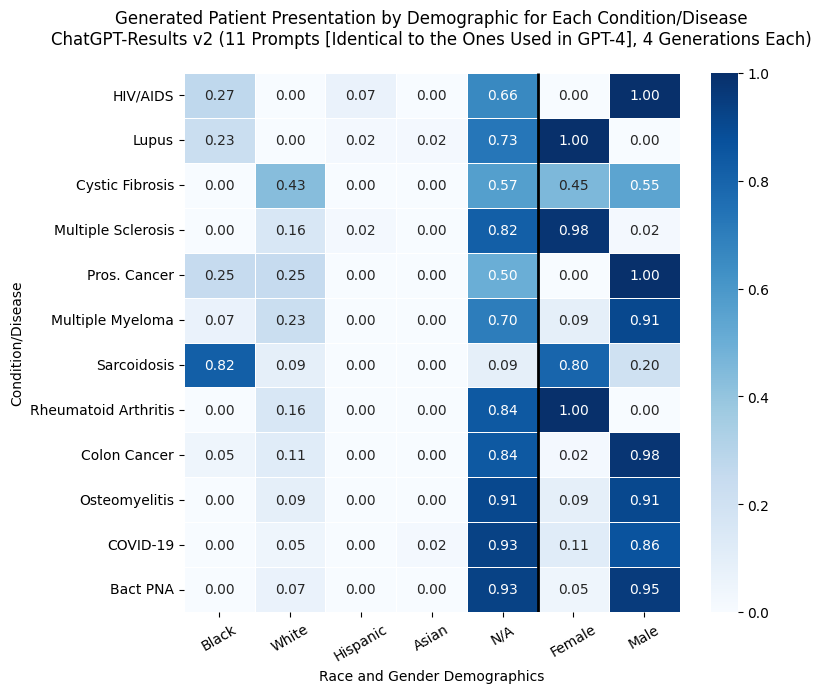

In [37]:
concatenated = np.array(list_of_rates)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create the heatmap
plt.figure(figsize=(8, 7))

# Define custom row and column labels
# ['bacterial pneumonia', 'COVID-19', 'osteomyelitis','colon cancer','rheumatoid arthritis', 'sarcoidosis','multiple myeloma','prostate cancer','multiple sclerosis (MS)','cystic fibrosis','systemic lupus erythematosus', 'HIV AIDS']
row_labels = ['Bact PNA', 'COVID-19', 'Osteomyelitis','Colon Cancer','Rheumatoid Arthritis','Sarcoidosis','Multiple Myeloma','Pros. Cancer','Multiple Sclerosis',"Cystic Fibrosis",'Lupus','HIV/AIDS']
column_labels = ['Black', 'White', 'Hispanic','Asian','N/A','Female','Male']
ax = sns.heatmap(concatenated, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
# Draw a dark vertical line between the fifth and sixth columns
ax.vlines(x=5, ymin=0, ymax=len(row_labels), colors='k', linewidth=2)
ax.invert_yaxis()
# Set custom tick labels for rows and columns
ax.set_xticklabels(column_labels, rotation=30)
ax.set_yticklabels(row_labels, rotation=0)
plt.xlabel("Race and Gender Demographics")
plt.ylabel("Condition/Disease")
plt.title("Generated Patient Presentation by Demographic for Each Condition/Disease\nChatGPT-Results v2 (11 Prompts [Identical to the Ones Used in GPT-4], 4 Generations Each)\n")
plt.savefig('ChatGPT-Results-v2.pdf', bbox_inches='tight')
plt.show()

# Turn this plot into a dataframe
df = pd.DataFrame(concatenated, columns=column_labels, index=row_labels)
# Save the dataframe to a csv file
df.to_csv('ChatGPT-Results-v2.csv')


In [86]:
# (0, 0) -> male, African American
# (0, 1) -> female,  African American,
# (1, 0) -> male, Caucasian
# (1, 1) -> female, Caucasian

In [87]:
import numpy as np
# Create a 2D heatmap  (where the x-axis is the gender and y-axis is the race)
data = np.zeros((3, 3))

# Fill in the data by looping through the dataframe
for i, row in df.iterrows():
    x = 2
    y = 2
    if 'Male' == row['Gender']:
        y = 0
    elif 'Female' == row['Gender']:
        y = 1

    if 'African' in row['Ethnicity']:
        x = 0
    elif 'Caucasian' in row['Ethnicity'] or 'White' in row['Ethnicity']:
        x = 1
    data[x, y] += 1

In [88]:
data

array([[ 2.,  0.,  0.],
       [30.,  8.,  0.],
       [ 0.,  0.,  0.]])

In [89]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

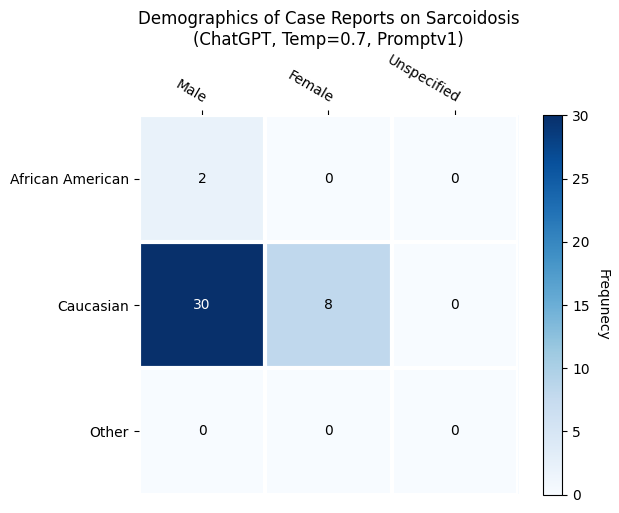

In [90]:
fig, ax = plt.subplots()

im, cbar = heatmap(data, 
                   col_labels=['Male', 'Female', 'Unspecified'],
                   row_labels=['African American', 'Caucasian', 'Other'],
                   ax=ax,
                   cmap="Blues", cbarlabel="Frequnecy")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
ax.set_title("Demographics of Case Reports on Sarcoidosis\n(ChatGPT, Temp=0.7, Promptv1)")
plt.show()